In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
## load the data 
train = pd.read_csv('Train.csv')

In [3]:
train

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.isnull().sum() * 100 / len(train)

Place_ID X Date                  0.00000
Date                             0.00000
Place_ID                         0.00000
target                           0.00000
target_min                       0.00000
                                  ...   
L3_CH4_aerosol_optical_depth    81.04526
L3_CH4_sensor_azimuth_angle     81.04526
L3_CH4_sensor_zenith_angle      81.04526
L3_CH4_solar_azimuth_angle      81.04526
L3_CH4_solar_zenith_angle       81.04526
Length: 82, dtype: float64

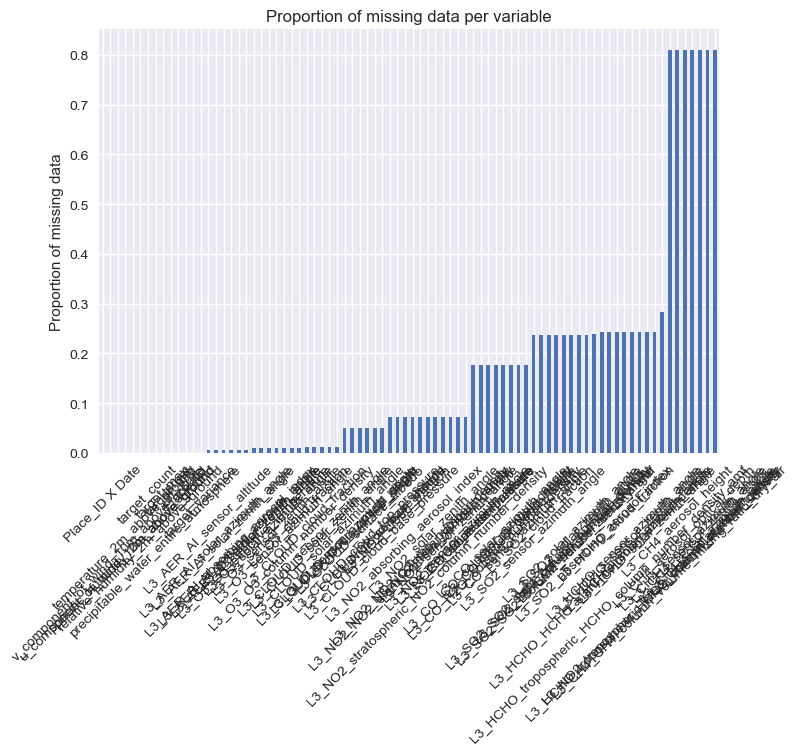

In [43]:
## plot the train value in plot
import seaborn as sns
with plt.style.context("seaborn"):
    train.isnull().mean().sort_values(ascending=True).plot.bar(rot=45)
    plt.ylabel("Proportion of missing data")
    plt.title("Proportion of missing data per variable")
    plt.show()

In [42]:
train.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [10]:
data_cc = train.dropna()

In [13]:
print(f"Total number of observations: {len(train)}")
print(f"Number of observations without missing data {len(data_cc)}")

Total number of observations: 30557
Number of observations without missing data 3915


### Using feature-engine to drop the massing value

In [15]:
from feature_engine.imputation import DropMissingData

In [17]:
data_clear = DropMissingData(variables=None, missing_only=True)

In [19]:
data_clear.fit(train)

DropMissingData()

In [20]:
data_clear.variables_

['L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angle',
 'L3_HCHO_sensor

In [22]:
data_ = data_clear.transform(train)

In [23]:
data_.isnull().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

## Using the threshold To Drop the Massing value

In [57]:
data_threshold = DropMissingData(variables=None, threshold=0.95)

In [60]:
data_clearn_2 = data_threshold.fit(train)

In [61]:
data_clear = data_clearn_2.transform(train)

In [62]:
data_clear

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
9,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,010Q650 X 2020-01-12,2020-01-12,010Q650,31.0,22.0,38.0,153.08,72,12.200000,28.000000,...,21.439475,-62.253749,24.637207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,010Q650 X 2020-01-14,2020-01-14,010Q650,29.0,17.0,44.0,673.83,96,12.500000,38.000000,...,59.928062,-61.129989,27.656506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,010Q650 X 2020-01-15,2020-01-15,010Q650,23.0,11.0,43.0,682.80,96,17.700001,36.400002,...,44.042485,-73.531338,33.016922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30510,YWSFY6Q X 2020-02-02,2020-02-02,YWSFY6Q,23.0,14.0,70.0,2351.20,72,19.269308,85.200005,...,51.947060,5.491190,64.144131,1854.349384,3752.561556,0.018772,-94.925903,38.749389,-161.599964,64.901579
30524,YWSFY6Q X 2020-02-16,2020-02-16,YWSFY6Q,83.0,56.0,124.0,3155.00,24,8.900001,88.700005,...,39.575808,-177.807478,58.533193,1870.378418,4087.396973,0.034164,64.039513,39.289459,-177.633682,58.446751
30542,YWSFY6Q X 2020-03-05,2020-03-05,YWSFY6Q,63.0,24.0,106.0,5620.89,66,7.600000,74.800003,...,51.964502,7.076088,53.270235,1855.222995,3314.133968,0.022721,-94.720330,39.619695,-157.540329,54.250513
30549,YWSFY6Q X 2020-03-12,2020-03-12,YWSFY6Q,56.0,23.0,156.0,16293.50,72,18.400000,70.000000,...,0.536078,-165.828479,50.041990,1854.680335,3284.730809,0.012401,-33.540973,1.146650,-165.716652,50.088737


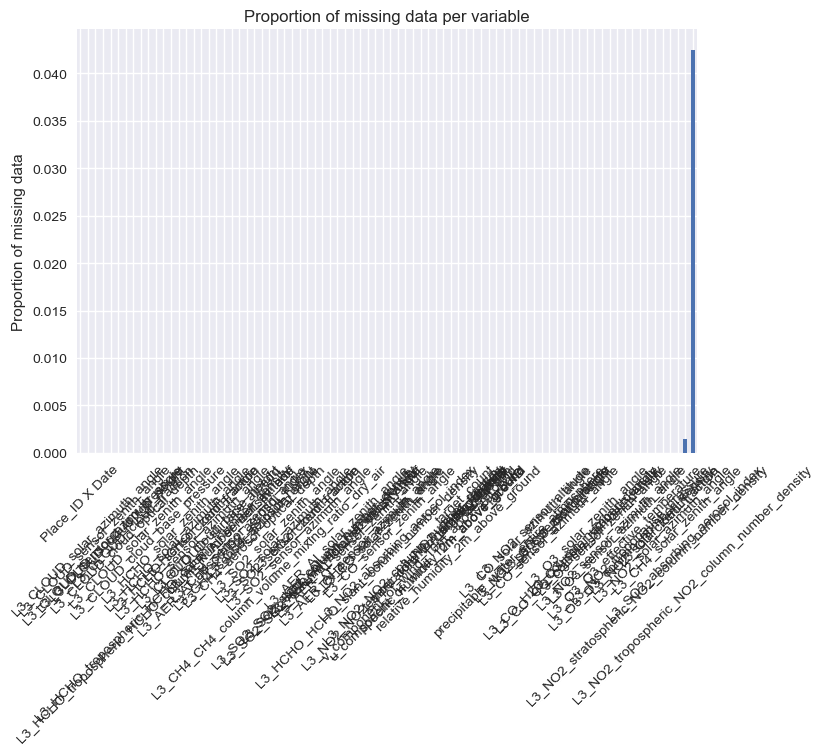

In [63]:
## plot the train value in plot
with plt.style.context("seaborn"):
    data_clear.isnull().mean().sort_values(
    ascending=True).plot.bar(rot=45)
    plt.ylabel("Proportion of missing data")
    plt.title("Proportion of missing data per variable")
    plt.show()

#### Performing mean or median imputation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import MeanMedianImputer

In [65]:
train

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
 train.drop("target", axis=1),
 train["target"],
 test_size=0.3,
 random_state=0,
)

In [69]:
X_train

,Place_ID X Date,Date,Place_ID,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
14910,FUTHSQ2 X 2020-01-26,2020-01-26,FUTHSQ2,1.0,30.0,454.82,82,23.851110,75.700005,0.010967,...,59.990281,-58.180047,29.123075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21069,NW6MZ2E X 2020-01-28,2020-01-28,NW6MZ2E,5.0,50.0,969.02,30,21.000000,86.700005,0.008630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6073,693EWQR X 2020-01-14,2020-01-14,693EWQR,13.0,86.0,3804.65,65,9.400000,68.000000,0.004649,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,0KV6RJ1 X 2020-01-25,2020-01-25,0KV6RJ1,25.0,160.0,9900.44,188,30.526728,81.800003,0.011419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26839,UB2EP6X X 2020-03-18,2020-03-18,UB2EP6X,74.0,184.0,6552.97,24,38.500000,72.200005,0.015410,...,24.940457,-141.481913,23.440249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,DXU9CSJ X 2020-01-04,2020-01-04,DXU9CSJ,13.0,89.0,2260.68,144,9.900001,66.160004,0.004168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19648,LBFYBY5 X 2020-02-03,2020-02-03,LBFYBY5,127.0,152.0,1408.45,72,21.271658,93.666669,0.006458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9845,B7XRCR9 X 2020-01-16,2020-01-16,B7XRCR9,5.0,102.0,1510.11,172,8.300000,49.600002,0.002685,...,9.759876,-163.733715,59.413682,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10799,C39T5GU X 2020-03-23,2020-03-23,C39T5GU,17.0,53.0,864.33,24,22.525000,86.937502,0.006870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
umeric_vars = X_train.select_dtypes(exclude="O").columns.to_list()

In [72]:
umeric_vars

['target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_de

In [74]:
median_values = X_train[umeric_vars].median().to_dict()

In [75]:
median_values

{'target_min': 15.0,
 'target_max': 91.0,
 'target_variance': 2413.91,
 'target_count': 72.0,
 'precipitable_water_entire_atmosphere': 12.199999809265137,
 'relative_humidity_2m_above_ground': 74.20000457763672,
 'specific_humidity_2m_above_ground': 0.0049000000581145,
 'temperature_2m_above_ground': 8.410496012369814,
 'u_component_of_wind_10m_above_ground': 0.2240014672279358,
 'v_component_of_wind_10m_above_ground': -0.0087320903937021,
 'L3_NO2_NO2_column_number_density': 7.549193914119779e-05,
 'L3_NO2_NO2_slant_column_number_density': 0.0001508254292802,
 'L3_NO2_absorbing_aerosol_index': -1.1683142654653953,
 'L3_NO2_cloud_fraction': 0.1480287610215858,
 'L3_NO2_sensor_altitude': 831603.2597963752,
 'L3_NO2_sensor_azimuth_angle': -12.672332348130878,
 'L3_NO2_sensor_zenith_angle': 35.385245506880366,
 'L3_NO2_solar_azimuth_angle': -155.28773591463874,
 'L3_NO2_solar_zenith_angle': 47.60268439953539,
 'L3_NO2_stratospheric_NO2_column_number_density': 3.3634174940025706e-05,
 'L3_

In [76]:
X_train = X_train.fillna(value=median_values)
X_test = X_test.fillna(value=median_values)

## Finding extreme values for imputation

Replacing missing values with a value at the end of the variable distribution (extreme values) is 
equivalent to replacing them with an arbitrary value, but instead of identifying the arbitrary values 
manually, these values are automatically selected as those at the very end of the variable distribution. 
Missing data can be replaced with a value that is greater or smaller than the remaining values in the 
variable. To select a value that is greater, we can use the mean plus a factor of the standard deviation, 
or the 75th quantile + (IQR * 1.5), where IQR is the IQR given by the 75th quantile - the 25th quantile. 
To replace missing data with values that are smaller than the remaining values, we can use the mean 
minus a factor of the standard deviation, or the 25th quantile – (IQR * 1.5).

In [77]:
from feature_engine.imputation import EndTailImputer

In [79]:
numeric_vars = [
 var for var in train.select_dtypes(
 exclude="O").columns.to_list() if var !="target"
]
## select all the number value and the target

In [80]:
numeric_vars

['target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_de

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
 train[numeric_vars],
 train["target"],
 test_size=0.3,
 random_state=0,
)

In [82]:
IQR = X_train.quantile(0.75) - X_train.quantile(0.25)

In [83]:
IQR

target_min                                39.000000
target_max                                95.000000
target_variance                         4901.630000
target_count                             106.000000
precipitable_water_entire_atmosphere      12.239925
                                           ...     
L3_CH4_aerosol_optical_depth               0.023843
L3_CH4_sensor_azimuth_angle               62.019406
L3_CH4_sensor_zenith_angle                27.519167
L3_CH4_solar_azimuth_angle               161.855772
L3_CH4_solar_zenith_angle                 47.099920
Length: 78, dtype: float64

In [84]:
imputation_dict = (X_train.quantile(0.75) + 1.5 * IQR).to_dict()

In [85]:
imputation_dict

{'target_min': 102.5,
 'target_max': 297.5,
 'target_variance': 13331.994999999999,
 'target_count': 309.0,
 'precipitable_water_entire_atmosphere': 38.2664785385132,
 'relative_humidity_2m_above_ground': 125.26819073070176,
 'specific_humidity_2m_above_ground': 0.0138111257692798,
 'temperature_2m_above_ground': 35.8978668212891,
 'u_component_of_wind_10m_above_ground': 6.084740221500398,
 'v_component_of_wind_10m_above_ground': 5.9878527875989676,
 'L3_NO2_NO2_column_number_density': 0.00019438811916190103,
 'L3_NO2_NO2_slant_column_number_density': 0.00029144267384105,
 'L3_NO2_absorbing_aerosol_index': 0.41767871029611203,
 'L3_NO2_cloud_fraction': 1.1396744206900429,
 'L3_NO2_sensor_altitude': 839808.6459710082,
 'L3_NO2_sensor_azimuth_angle': 316.8546434109262,
 'L3_NO2_sensor_zenith_angle': 105.67475178957974,
 'L3_NO2_solar_azimuth_angle': 130.93573753918326,
 'L3_NO2_solar_zenith_angle': 93.70353977243353,
 'L3_NO2_stratospheric_NO2_column_number_density': 5.915603497413431e-0

In [86]:
X_train = X_train.fillna(value=imputation_dict)
X_test = X_test.fillna(value=imputation_dict)

In [88]:
X_train.isnull().sum()

target_min                              0
target_max                              0
target_variance                         0
target_count                            0
precipitable_water_entire_atmosphere    0
                                       ..
L3_CH4_aerosol_optical_depth            0
L3_CH4_sensor_azimuth_angle             0
L3_CH4_sensor_zenith_angle              0
L3_CH4_solar_azimuth_angle              0
L3_CH4_solar_zenith_angle               0
Length: 78, dtype: int64

##### imputer to estimate a value at the right of the distribution using the IQR proximity rule, specifying the variables to impute

In [89]:
imputer = EndTailImputer(
 imputation_method="iqr",
 tail="right",
 fold=3,
 variables=None,
)

In [90]:
imputer.fit(X_train)

EndTailImputer(imputation_method='iqr')

In [91]:
imputer.imputer_dict_

{'target_min': 161.0,
 'target_max': 440.0,
 'target_variance': 20684.44,
 'target_count': 468.0,
 'precipitable_water_entire_atmosphere': 56.62636566162111,
 'relative_humidity_2m_above_ground': 165.20910471135915,
 'specific_humidity_2m_above_ground': 0.020063471281900898,
 'temperature_2m_above_ground': 55.56792602539066,
 'u_component_of_wind_10m_above_ground': 10.398103547096255,
 'v_component_of_wind_10m_above_ground': 10.425600599497557,
 'L3_NO2_NO2_column_number_density': 0.0003319469231448954,
 'L3_NO2_NO2_slant_column_number_density': 0.0004520136689156,
 'L3_NO2_absorbing_aerosol_index': 2.0935193532978587,
 'L3_NO2_cloud_fraction': 2.2699055363755827,
 'L3_NO2_sensor_altitude': 847788.161602783,
 'L3_NO2_sensor_azimuth_angle': 569.1405250560447,
 'L3_NO2_sensor_zenith_angle': 166.76215109553704,
 'L3_NO2_solar_azimuth_angle': 495.0606388700405,
 'L3_NO2_solar_zenith_angle': 136.77379456916503,
 'L3_NO2_stratospheric_NO2_column_number_density': 8.463555574193506e-05,
 'L3_N

In [92]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [94]:
X_train.isnull().sum()

target_min                              0
target_max                              0
target_variance                         0
target_count                            0
precipitable_water_entire_atmosphere    0
                                       ..
L3_CH4_aerosol_optical_depth            0
L3_CH4_sensor_azimuth_angle             0
L3_CH4_sensor_zenith_angle              0
L3_CH4_solar_azimuth_angle              0
L3_CH4_solar_zenith_angle               0
Length: 78, dtype: int64

In [95]:
import category_encoders